# MCMC with LightCones

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from py21cmmc.mcmc import analyse
from py21cmmc import mcmc

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In this tutorial we demonstrate how to do MCMC with a lightcone, to fit just two astrophysical parameters without noise, and then visualise the results. This tutoorial follows a very similar pattern to the MCMC intro, and you should follow that one first.

In [5]:
import py21cmmc
py21cmmc.__version__

'0.1.0'

## Running MCMC

To perform an MCMC on a lightcone is *very* similar to a Coeval cube. Merely use the ``CoreLightConeModule`` as the core module, and the ``Likelihood1DPowerLightcone`` as the likelihood. One extra parameter to the ``core`` is available -- ``max_redshift``, which specifies the approximate upper limit on the lightcone's depth. Note that this does **not** necessarily specify the maximum redshift at which the ionization will be computed (this is specified by ``z_heat_max``), it merely specifies where to start saving the ionization boxes into a lightcone. 

Thus, for example:

In [6]:
core = mcmc.CoreLightConeModule( # All core modules are prefixed by Core* and end with *Module
    redshift = 7.0,              # Lower redshift of the lightcone
    max_redshift = 9.0,          # Approximate maximum redshift of the lightcone (will be exceeded).
    user_params = dict(       
        HII_DIM = 50,         
        BOX_LEN = 125.0
    ),
    z_step_factor=1.04,          # How large the steps between evaluated redshifts are (log).
    z_heat_max=18.0,             # Completely ineffective since no spin temp or inhomogeneous recombinations.
    regenerate=False          
) # For other available options, see the docstring.

# Now the likelihood...
likelihood = mcmc.Likelihood1DPowerLightcone(  # All likelihood modules are prefixed by Likelihood*
    datafile = "data/lightcone_mcmc_data.txt", # All likelihoods have this, which specifies where to write/read data
    logk=False,                             # Should the power spectrum bins be log-spaced?
    min_k=0.1,                              # Minimum k to use for likelihood
    max_k=1.0,                              # Maximum ""
) # For other available options, see the docstring

Actually run the MCMC:

In [ ]:
model_name = "LightconeTest"

chain = mcmc.run_mcmc(
    core, likelihood,        # Use lists if multiple cores/likelihoods required. These will be eval'd in order.
    datadir='data',          # Directory for all outputs
    model_name=model_name,   # Filename of main chain output
    params=dict(             # Parameter dict as described above.
        HII_EFF_FACTOR = [30.0, 10.0, 50.0, 3.0],
        ION_Tvir_MIN = [4.7, 2, 8, 0.1],
    ), 
    walkersRatio=12,         # The number of walkers will be walkersRatio*nparams
    burninIterations=0,      # Number of iterations to save as burnin. Recommended to leave as zero.
    sampleIterations=100,    # Number of iterations to sample, per walker.
    threadCount=6,           # Number of processes to use in MCMC (best as a factor of walkersRatio)
    continue_sampling=False  # Whether to contine sampling from previous run *up to* sampleIterations.
)

Initializing init and perturb boxes for the entire chain...Existing init_boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
 done.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Writing mock data to file
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes foun

Existing z=7.5712 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field box

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 per

Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
E

Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 pertur

Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 pertur

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and

Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and rea

Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing

Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 pertur

Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_fiel

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field b

Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.1890

Existing z=7.0 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.85

Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Exis

Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes fo

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_f

Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z

Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.51

Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 pertur

Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 pertur

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Exi

Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes

Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.0 perturb

Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and 

Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and rea

Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z

Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field box

Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb

Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_fie

Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.8740

Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and rea

Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316

Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes 

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes

Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 per

Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and rea

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_fiel

Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field

Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and rea

Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read 

Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes

Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes

Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Ex

Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.8

Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found a

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes fo

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes fou

Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 pertu

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Exi

Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z

Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes

Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes f

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.

Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8

Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes fou

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing

Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_f

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes foun

Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and rea

Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing

Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.18900992 

Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxe

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.5712 

Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb

Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_fie

Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field 

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z

Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found an

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes 

Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field box

Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z

Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.516570316800001 perturb_field boxes found and read in.
Existing

Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.21

Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read in.
Existing z=8.857233129472002 perturb_field boxes found and read

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=9.211522454650883 perturb_field boxes found an

Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxes found and read in.
Existing z=7.5

Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=8.18900992 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
E

Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.874048 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.5712 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.28 perturb_field boxes found and read in.
Existing z=7.0 perturb_field boxe

## Analysis

### Accessing chain data

Access the samples object within the chain (see the intro for more details):

In [9]:
samples = chain.samples

### Trace Plot

Often, for diagnostic purposes, the most useful plot to start with is the trace plot. This enables quick diagnosis of burnin time and walkers that haven't converged. The function in ``py21cmmc`` by default plots the log probability along with the various parameters that were fit. It also supports setting a starting iteration, and a thinning amount. 

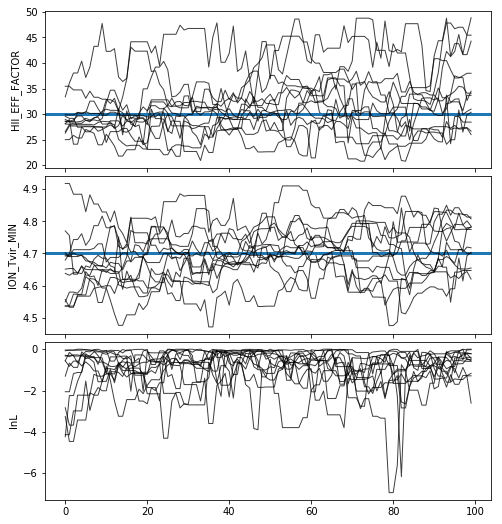

In [17]:
analyse.trace_plot(samples, include_lnl=True, start_iter=0, thin=1, colored=False, show_guess=True);

### Corner Plot

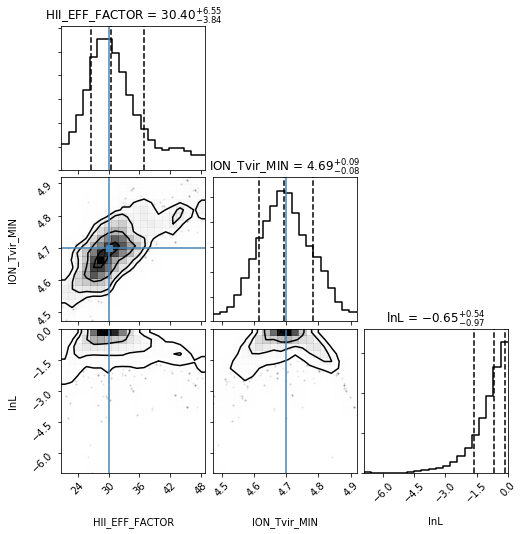

In [20]:
analyse.corner_plot(samples);

### Model Comparison Plot

Extract all blob data from the samples:

In [21]:
blobs = samples.get_blobs()

For simplicity, let's extract each kind of blob from the blob structured array:

In [29]:
k = blobs['k'][0]
model_power = blobs['power']
_, _, nk = model_power.shape

(100, 12, 7) (100, 12, 7)


Read in the data:

In [25]:
p_data = np.array(likelihood.p_data)
k_data = likelihood.k_data

Now, let's define a function which will plot our model comparison:

In [42]:
def model_compare_plot(samples, p_data, thin=1, start_iter=0):
    chain = samples.get_chain(thin=thin, discard=start_iter, flat=True)
    blobs = samples.get_blobs(thin=thin, discard=start_iter, flat=True)
    
    k = blobs['k'][0]
    model_power = blobs['power']
    
    niter, nk = model_power.shape
    
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6*1, 4.5), 
                          subplot_kw={"xscale":'log', "yscale":'log'}, gridspec_kw={"hspace":0.05, 'wspace':0.05},
                          squeeze=False)

    for i in range(1):
        this_power = model_power[:,:]
        this_data = p_data

        label="models"
        every=1

        for pp in this_power[::every]:
            ax[0,i].plot(k, pp*k**3, color='k', alpha=0.2, label=label, zorder=1)
            if label:
                label=None

        mean = np.mean(this_power*k**3, axis=0)
        std = np.std(this_power*k**3, axis=0)
        md = np.median(this_power*k**3, axis=0)

        ax[0,i].fill_between(k, mean - std, mean+std, color="C0", alpha=0.6)
        ax[0,i].plot(k, md, color="C0", label="median model")

        ax[0,i].errorbar(k, this_data*k**3, yerr = (0.15*this_data*k**3), color="C1", 
                     label="data", ls="None", markersize=5, marker='o')

        ax[0,i].set_xlabel("$k$ [Mpc$^{-3}$]", fontsize=15)
        ax[0,i].text(0.1, 0.86, "z=%s"%core.redshift, transform=ax[0,i].transAxes, fontsize=15, fontweight='bold')

    ax[0,0].legend(fontsize=12)
    #plt.ylim((3.1e2, 3.5e3))


    ax[0,0].set_ylabel("$k^3 P$", fontsize=15)

#plt.savefig(join(direc, modelname+"_power_spectrum_plot.pdf"))

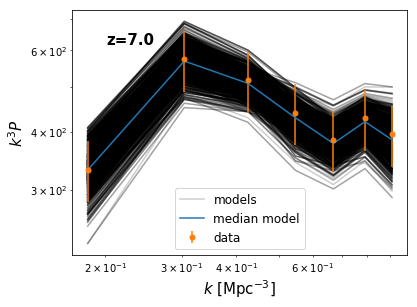

In [43]:
model_compare_plot(samples, p_data)